### *Étape A : Préparation (Chargement, nettoyage des 0, standardisation).*

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sl
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import joblib

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
data.shape

(768, 9)

In [5]:
#data.head(20)

In [6]:
cols_to_fix = ['Glucose', 'BloodPressure', 'BMI', 'Insulin', 'SkinThickness']
data[cols_to_fix] = data[cols_to_fix].replace(0, np.nan)

In [7]:
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].median())
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())

In [8]:
#data.head(20)

In [9]:
x = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = data['Outcome'].values

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

## *Étape B : Entraînement*

## 1.la Régression Logistique

In [14]:
# On garde 20% des données pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Création du modèle
model_lr = LogisticRegression()

# Entraînement
model_lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_predt = model_lr.predict(X_train)
accuracy_score(y_train,y_predt)

0.7703583061889251

In [19]:
# Prédiction sur les données de test
y_pred = model_lr.predict(X_test)

# Affichage des résultats
print(f"Précision du modèle : {accuracy_score(y_test, y_pred):.2f}")
print("\nMatrice de Confusion :")
print(confusion_matrix(y_test, y_pred))

Précision du modèle : 0.75

Matrice de Confusion :
[[82 17]
 [21 34]]


## 2.la PCA

In [24]:
# On veut réduire à 2 dimensions pour le graphique
pca = PCA(n_components=2)

# On applique la PCA sur nos données standardisées
X_pca = pca.fit_transform(X)

# On crée un nouveau tableau (DataFrame) pour manipuler plus facilement
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Outcome'] = y # On rajoute la cible pour la couleur

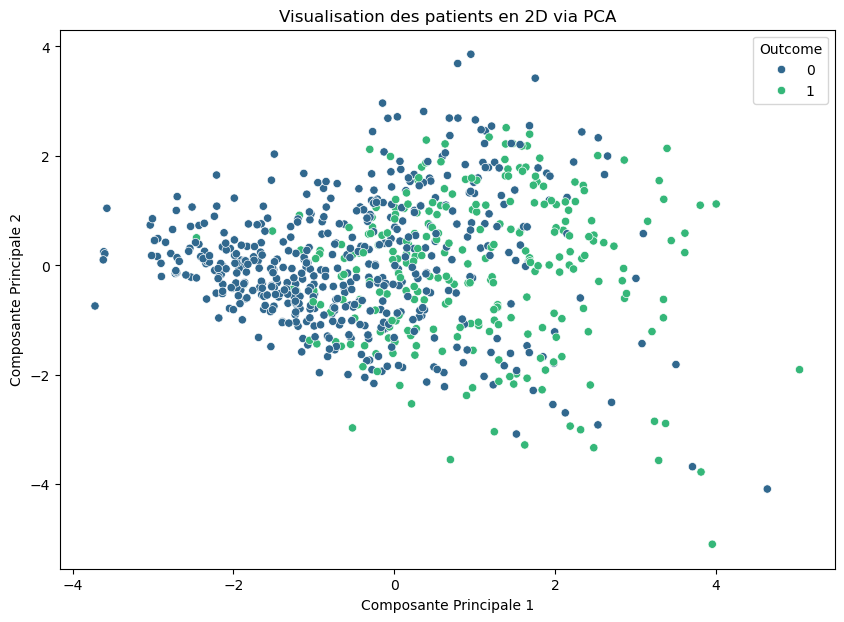

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=df_pca, palette='viridis')
plt.title('Visualisation des patients en 2D via PCA')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

## 3.l'Isolation Forest

In [34]:
# On crée le modèle
# contamination=0.05 signifie qu'on s'attend à environ 5% d'anomalies dans les données
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# On l'entraîne sur nos données standardisées X
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [37]:
# On prédit sur nos données pour voir ce qu'il détecte
anomalies = iso_forest.predict(X)

# On compte le nombre d'anomalies détectées
n_anomalies = (anomalies == -1).sum()
print(f"Nombre d'anomalies détectées dans le dataset : {n_anomalies}")

Nombre d'anomalies détectées dans le dataset : 39


## *Étape C : Sauvegarde* 

In [32]:
# On sauvegarde le modèle et le scaler
joblib.dump(model_lr, 'model_logistique.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']

In [39]:
joblib.dump(iso_forest, 'iso_forest_model.pkl')

['iso_forest_model.pkl']